Israel Beyene

# Supervised learning in python using scikit-learn on the dataset Crabs of MASS packages of R

Supervised learning is one type of machine learning. Here the training set of data contains a label.The goal of this learning is to predict the label (target or class) of a new data (test set).
eg. to predict someone sickness given different features (laboratory result, symptom etc.)
Bayes classifier, Logistic Regression, Deep Learning, Support Vector Machines are some of the most commonly used algorithm in supervised learning.

For this project the dataset of crabs of  MASS package of R was used. It is a data of rock crabs of the genus Leptograpsus. One species, L. variegatus, had been split into two new species according to their colour orange (O) and blue (B). Preserved specimens lose their colour, so it was hoped that morphological differences would enable museum material to be classified.
Data are available on 50 specimens of each sex of each species. Each specimen has measurements on:
the width of the frontal lobe FL,
the rear width RW,
the length along the carapace midline CL,
the maximum width CW of the carapace,
and the body depth BD in mm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium


In [4]:
import sys
import pystan

In [5]:
import prophet.f

In [6]:
from prophet import fbprophet

ImportError: cannot import name 'fbprophet' from 'prophet' (C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\prophet\__init__.py)

Load up the crabs dataset into a dataframe.

In [2]:
df_line=pd.read_csv('lineBrig_topo.csv', encoding='latin',sep=',' )
df=pd.read_csv('lineBrig_topo.csv', encoding='latin',sep=',' )

In [5]:
df_line['Uhrzeit.ab'][df_line.UM_UID==140102].head()

358    2020-07-02 05:42:00
359    2020-07-02 05:42:00
360    2020-07-02 05:42:00
361    2020-07-02 05:42:00
362    2020-07-02 05:42:00
Name: Uhrzeit.ab, dtype: object

In [3]:
df_wifi=pd.read_csv('time_series.csv',sep=',' )

In [4]:
df_wifi['start_time']=pd.to_datetime(df_wifi['start_time'])
df_wifi['stop_time']=pd.to_datetime(df_wifi['stop_time'])

df_wifi.head(1)

Unnamed: 0                         site           appear.time  appear.lat  \
0     1116294  NetModule/2800/00112B0241B9   2020-07-02 05:11:44   46.318359   

   appear.lon        disappear.time  disappear.lat  disappear.lon  distance  \
0    7.993849   2020-07-02 05:12:59      46.318916       7.989738       278   

           start_time           stop_time        lat       lon  
0 2020-07-02 05:11:44 2020-07-02 05:12:59  46.318359  7.993849

map

In [11]:
def generateBaseMap(default_location=[46.31667, 7.98333], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [12]:
generateBaseMap()

In [15]:
from folium.plugins import HeatMap
df_copy = df_wifi.copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['appear.lat', 'appear.lon', 'count']].groupby(['appear.lat', 'appear.lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)


In [16]:
base_map

In [17]:
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))


In [23]:
df_hour_list = []
for hour in df_copy.start_time.dt.hour.sort_values().unique():
    df_hour_list.append(df_copy.loc[df_copy.start_time.dt.hour == hour, ['appear.lat', 'appear.lon', 'count']].groupby(['appear.lat', 'appear.lon',]).sum().reset_index().values.tolist())


In [26]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=13)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [20]:
df_copy.start_time.dt.hour.unique

<bound method Series.unique of 0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
10033    20
10034    20
10035    20
10036    20
10037    20
10038    20
10039    20
10040    20
10041    20
10042    20
10043    20
10044    20
10045    20
10046    20
10047    20
10048    20
10049    20
10050    20
10051    20
10052    20
10053    20
10054    20
10055    20
10056    20
10057    20
10058    20
10059    20
10060    20
10061    20
10062    18
Name: start_time, Length: 10063, dtype: int64>

In [5]:
df_wifi_appear=df_wifi[['lon','lat','start_time']]

df_wifi_appear['start_time']=df_wifi_appear['start_time'].sub(pd.Timestamp('2020-07-02')).dt.seconds
df_wifi_appear.head()


C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


lon        lat  start_time
0  7.993849  46.318359       18704
1  7.993855  46.318321       18730
2  7.992032  46.319176       18760
3  7.993256  46.319248       18750
4  7.994158  46.318378       18559

In [6]:
df_wifi_disappear=df_wifi[['lon','lat','stop_time']]
df_wifi_disappear['stop_time']=pd.to_datetime(df_wifi_disappear['stop_time'])

df_wifi_disappear['stop_time']=df_wifi_disappear['stop_time'].sub(pd.Timestamp('2020-07-02')).dt.seconds
df_wifi_disappear.head()

C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


lon        lat  stop_time
0  7.993849  46.318359      18779
1  7.993855  46.318321      18802
2  7.992032  46.319176      18851
3  7.993256  46.319248      18851
4  7.994158  46.318378      18865

To check the data structure of this data frame

In [7]:
print(df.head())
print(df.shape)


   Unnamed: 0          start  LI_VA       lon        lat  line_id  \
0           1  Brig, Bahnhof    101  7.988318  46.319165        1   
1           2  Brig, Bahnhof    101  7.988305  46.319174        1   
2           3  Brig, Bahnhof    101  7.988239  46.319084        1   
3           4  Brig, Bahnhof    101  7.986564  46.319129        1   
4           5  Brig, Bahnhof    101  7.986516  46.319426        1   

                  stop  ziel.lng  ziel.lat  UM_UID  LI_NR  \
0  Naters, Rottubrigga    7.9864   46.3208  140103    666   
1  Naters, Rottubrigga    7.9864   46.3208  140103    666   
2  Naters, Rottubrigga    7.9864   46.3208  140103    666   
3  Naters, Rottubrigga    7.9864   46.3208  140103    666   
4  Naters, Rottubrigga    7.9864   46.3208  140103    666   

            Uhrzeit.ab           Uhrzeit.an  start_lat  start_lon      line  
0  2020-07-02 05:12:00  2020-07-02 05:13:00  46.319165   7.988318  line_1_1  
1  2020-07-02 05:12:00  2020-07-02 05:13:00  46.319165   7.988

In [7]:
# excluding id and index
df=df[['lon','lat','Uhrzeit.ab','UM_UID']]
df.head()

lon        lat           Uhrzeit.ab  UM_UID
0  7.988318  46.319165  2020-07-02 05:12:00  140103
1  7.988305  46.319174  2020-07-02 05:12:00  140103
2  7.988239  46.319084  2020-07-02 05:12:00  140103
3  7.986564  46.319129  2020-07-02 05:12:00  140103
4  7.986516  46.319426  2020-07-02 05:12:00  140103

In [8]:
import datetime
df['start_time']=pd.to_datetime(df['Uhrzeit.ab'])

df['start_time']=df['start_time'].sub(pd.Timestamp('2020-07-02')).dt.seconds

In [6]:

#df['start_time']=pd.to_datetime(df['Uhrzeit.ab'])
#df.info()
#pd.to_numeric(df['Uhrzeit.ab'].str.replace('-','',':'))
#df['seq']= int(df['start_time'].dt.strftime("%Y%m%d%H%M%S"))
#df['start_time']=pd.to_datetime(df['start_time']).value/1000
#df['start_time'].apply(lambda x:x.toordinal()*1000)
df.head()

lon        lat           Uhrzeit.ab  UM_UID  start_time
0  7.988318  46.319165  2020-07-02 05:12:00  140103       18720
1  7.988305  46.319174  2020-07-02 05:12:00  140103       18720
2  7.988239  46.319084  2020-07-02 05:12:00  140103       18720
3  7.986564  46.319129  2020-07-02 05:12:00  140103       18720
4  7.986516  46.319426  2020-07-02 05:12:00  140103       18720

In [9]:
y = df.UM_UID #label

In [10]:
y.unique()

array([140103, 140104, 140102, 140101], dtype=int64)

In [11]:
df.drop(["Uhrzeit.ab","UM_UID"],axis = 1, inplace = True)
#cleaning the data frame
print(df.head(3))

        lon        lat  start_time
0  7.988318  46.319165       18720
1  7.988305  46.319174       18720
2  7.988239  46.319084       18720


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57052 entries, 0 to 57051
Data columns (total 3 columns):
lon           57052 non-null float64
lat           57052 non-null float64
start_time    57052 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.3 MB


In [12]:
print(df[pd.isnull(df).any(axis=1)])#it is also important to check any null data

Empty DataFrame
Columns: [lon, lat, start_time]
Index: []


In [11]:
y.size

57052

Split the data into  train and test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, stratify=y,test_size = 0.25,random_state=66)

In [20]:
print(y_test.size)
print(y_test.head(3))
print(X_test.head(3))

14263
27151    140103
24235    140101
21438    140104
Name: UM_UID, dtype: int64
            lon        lat  start_time
27151  7.984895  46.315826       41880
24235  7.989575  46.317684       23760
21438  8.011576  46.329413       58020


In [14]:
df.iloc[51,:]

lon               7.991297
lat              46.323613
start_time    18780.000000
Name: 51, dtype: float64

# # K-Nearest Neighbors Classifier

Given a new measurement of a crabs, the task of the classifier is to figure out to which of the four
label it belongs. KNN is thesimplest possible classifier. The algorithm searches within the features in
the training set that most closely resembles the test sample.

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of knn classifier on \
training set using default n_neighbors is: {:.2f}%'.format
      (knn.score(X_train, y_train)*100))
print('Accuracy of knn classifier on \
test set using default n_neighbors is: {:.2f}%'.format
      (knn.score(X_test, y_test)*100))


Accuracy of knn classifier on training set using default n_neighbors is: 99.14%
Accuracy of knn classifier on test set using default n_neighbors is: 98.48%


let's search the K value which perform best

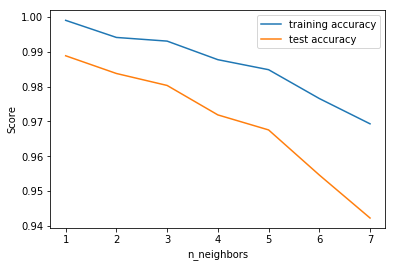

In [16]:
from sklearn.neighbors import KNeighborsClassifier
training_score = []
test_score = []
KNeighbors = range(1, 8)
for n_neighbors in KNeighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
plt.plot(KNeighbors, training_score, label="training accuracy")
plt.plot(KNeighbors, test_score, label="test accuracy")
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [22]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print('Accuracy of knn classifier on \
training set using n_neighbors =1 is: {:.2f}%'.format
      (knn1.score(X_train, y_train)*100))
print('Accuracy of knn classifier on \
test set using n_neighbors =1 is: {:.2f}%'.format
      (knn1.score(X_test, y_test)*100))


Accuracy of knn classifier on training set using n_neighbors =1 is: 99.85%
Accuracy of knn classifier on test set using n_neighbors =1 is: 99.15%


In [38]:
print("Feature importances:\n{}".format(knn1.feature_importances_))

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

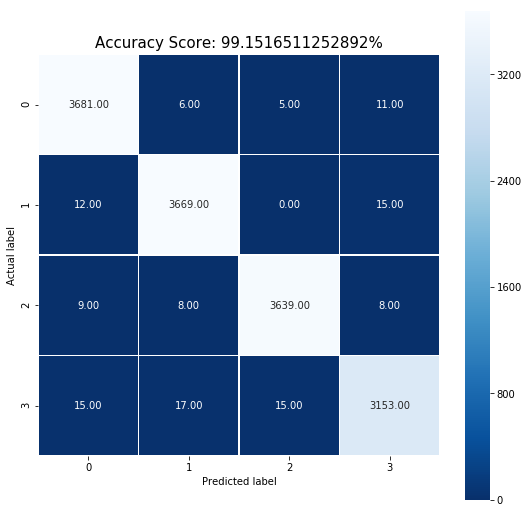

In [23]:
#another way of showing confusion matrix
from sklearn import metrics
plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, knn1.predict(X_test)), annot=True, fmt=".2f", 
            linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
score=knn1.score(X_test, y_test)
plt.title('Accuracy Score: {0}%'.format(score*100), size = 15)
plt.show()

 k value 1 improves the accuracy on both test and train set but it leads to overfitting (100%).


### Test wifi data appear

In [106]:
y_pred=knn.predict(df_wifi_appear[['lon','lat','start_time']]) #to predict the label of the new test data set
#y_pred=rf.predict(df_wifi_appear[['lon','lat','start_time']])
#y_pred=tree.predict(df_wifi_appear[['lon','lat','start_time']])
#y_pred


In [107]:
df_wifi['appear_pred']=y_pred

In [60]:
df_wifi[['site','appear_pred']].head(10)

site  appear_pred
0  NetModule/2800/00112B0241B9       140103
1  NetModule/2800/00112B0241F7       140103
2  NetModule/2800/00112B0241B9       140102
3  NetModule/2800/00112B0241B9       140102
4  NetModule/2800/00112B0241F7       140101
5  NetModule/2800/00112B0241F7       140102
6  NetModule/2800/00112B0241B9       140102
7  NetModule/2800/00112B0241B9       140102
8  NetModule/2800/00112B0241B9       140102
9  NetModule/2800/00112B0241B9       140102

In [72]:
#df_wifi[['site','appear_pred']].groupby()count
df_wifi[['site','appear_pred','lon']].groupby(['site','appear_pred'])['lon'].count()

site                         appear_pred
NetModule/2800/00112B024137  140101          343
                             140102          309
                             140103          279
                             140104          310
NetModule/2800/00112B0241B9  140101          569
                             140102         1365
                             140103          241
                             140104          318
NetModule/2800/00112B0241CD  140101           93
                             140102           55
                             140103          131
                             140104           10
NetModule/2800/00112B0241F7  140101          202
                             140102          423
                             140103         1358
                             140104          204
NetModule/2800/00112B024213  140101          479
                             140102          474
                             140103          440
                            

In [78]:
df_wifi[['site','appear_pred_rf','lon']].groupby(['site','appear_pred_rf'])['lon'].count()

site                         appear_pred_rf
NetModule/2800/00112B024137  140101             303
                             140102             346
                             140103             296
                             140104             296
NetModule/2800/00112B0241B9  140101             435
                             140102            1654
                             140103             121
                             140104             283
NetModule/2800/00112B0241CD  140101              98
                             140102              56
                             140103             135
NetModule/2800/00112B0241F7  140101              84
                             140102             389
                             140103            1520
                             140104             194
NetModule/2800/00112B024213  140101             199
                             140102             160
                             140103             192
                    

NetModule/2800/00112B0241B9  140102            1654
NetModule/2800/00112B0241F7  140103            1520
NetModule/2800/00112B024213  140104            2214
NetModule/2800/00112B024227  140101             620


In [85]:
df_wifi[['site','appear_pred_dt','lon']].groupby(['site','appear_pred_dt'])['lon'].count()

site                         appear_pred_dt
NetModule/2800/00112B024137  140101             320
                             140102             343
                             140103             308
                             140104             270
NetModule/2800/00112B0241B9  140101             399
                             140102            1706
                             140103             114
                             140104             274
NetModule/2800/00112B0241CD  140101              98
                             140102              56
                             140103             135
NetModule/2800/00112B0241F7  140101              91
                             140102             322
                             140103            1586
                             140104             188
NetModule/2800/00112B024213  140101             206
                             140102             185
                             140103             202
                    

## disappear test

In [95]:
y_pred=knn.predict(df_wifi_disappear[['lon','lat','stop_time']]) #to predict the label of the new test data set
#y_pred=rf.predict(df_wifi_appear[['lon','lat','start_time']])
#y_pred=tree.predict(df_wifi_disappear[['lon','lat','start_time']])

df_wifi['disappear_pred']=y_pred


In [99]:
df_wifi[['site','disappear_pred','lon']].groupby(['site','disappear_pred'])['lon'].count()

site                         disappear_pred
NetModule/2800/00112B024137  140101             320
                             140102             348
                             140103             288
                             140104             285
NetModule/2800/00112B0241B9  140101             689
                             140102            1044
                             140103             430
                             140104             330
NetModule/2800/00112B0241CD  140101              91
                             140102              62
                             140103             125
                             140104              11
NetModule/2800/00112B0241F7  140101             377
                             140102             604
                             140103             943
                             140104             263
NetModule/2800/00112B024213  140101             662
                             140102             545
                    

In [97]:
#y_pred=knn.predict(df_wifi_disappear[['lon','lat','stop_time']]) #to predict the label of the new test data set
y_pred=rf.predict(df_wifi_disappear[['lon','lat','stop_time']])
#y_pred=tree.predict(df_wifi_disappear[['lon','lat','start_time']])

df_wifi['disappear_pred_rf']=y_pred

In [98]:
df_wifi[['site','disappear_pred_rf','lon']].groupby(['site','disappear_pred_rf'])['lon'].count()

site                         disappear_pred_rf
NetModule/2800/00112B024137  140101                311
                             140102                339
                             140103                257
                             140104                334
NetModule/2800/00112B0241B9  140101                498
                             140102               1158
                             140103                323
                             140104                514
NetModule/2800/00112B0241CD  140101                 94
                             140102                 62
                             140103                133
NetModule/2800/00112B0241F7  140101                235
                             140102                474
                             140103               1028
                             140104                450
NetModule/2800/00112B024213  140101                357
                             140102                357
                  

In [100]:
#y_pred=knn.predict(df_wifi_disappear[['lon','lat','stop_time']]) #to predict the label of the new test data set
#y_pred=rf.predict(df_wifi_disappear[['lon','lat','stop_time']])
y_pred=tree.predict(df_wifi_disappear[['lon','lat','stop_time']])

df_wifi['disappear_pred_dt']=y_pred

In [101]:
df_wifi[['site','disappear_pred_dt','lon']].groupby(['site','disappear_pred_dt'])['lon'].count()

site                         disappear_pred_dt
NetModule/2800/00112B024137  140101                305
                             140102                363
                             140103                266
                             140104                307
NetModule/2800/00112B0241B9  140101                429
                             140102               1244
                             140103                324
                             140104                496
NetModule/2800/00112B0241CD  140101                 94
                             140102                 62
                             140103                133
NetModule/2800/00112B0241F7  140101                251
                             140102                401
                             140103               1104
                             140104                431
NetModule/2800/00112B024213  140101                381
                             140102                350
                  

In [112]:
print('knn==',len(df_wifi[df_wifi.appear_pred==df_wifi.disappear_pred]))
print('knn!=',len(df_wifi[df_wifi.appear_pred!=df_wifi.disappear_pred]))
print('dt==',len(df_wifi[df_wifi.appear_pred_dt==df_wifi.disappear_pred_dt]))
print('dt!=',len(df_wifi[df_wifi.appear_pred_dt!=df_wifi.disappear_pred_dt]))
print('rf==',len(df_wifi[df_wifi.appear_pred_rf==df_wifi.disappear_pred_rf]))
print('rf!=',len(df_wifi[df_wifi.appear_pred_rf!=df_wifi.disappear_pred_rf]))

knn== 4017
knn!= 6046
dt== 7627
dt!= 2436
rf== 7530
rf!= 2533


In [113]:
df_wifi[df_wifi.appear_pred_dt==df_wifi.disappear_pred_dt][['site','disappear_pred_dt','lon']].groupby(['site','disappear_pred_dt'])['lon'].count()

site                         disappear_pred_dt
NetModule/2800/00112B024137  140101                243
                             140102                294
                             140103                206
                             140104                240
NetModule/2800/00112B0241B9  140101                292
                             140102               1216
                             140103                 96
                             140104                267
NetModule/2800/00112B0241CD  140101                 87
                             140102                 48
                             140103                121
NetModule/2800/00112B0241F7  140101                 75
                             140102                222
                             140103               1090
                             140104                183
NetModule/2800/00112B024213  140101                171
                             140102                154
                  

In [15]:
conditions = [
    (df_wifi['site'] =="NetModule/2800/00112B0241B9"),
    (df_wifi['site'] =="NetModule/2800/00112B0241F7"),
    (df_wifi['site'] =="NetModule/2800/00112B024213"),
    (df_wifi['site'] == "NetModule/2800/00112B024227")
    ]

# create a list of the values we want to assign for each condition
values = [140102, 140103, 140104, 140101]

# create a new column and use np.select to assign values to it using our lists as arguments
df_wifi['UM_UID'] = np.select(conditions, values)

In [16]:
df_wifi.head()

Unnamed: 0                         site           appear.time  appear.lat  \
0     1116294  NetModule/2800/00112B0241B9   2020-07-02 05:11:44   46.318359   
1     1116295  NetModule/2800/00112B0241F7   2020-07-02 05:12:10   46.318321   
2     1116296  NetModule/2800/00112B0241B9   2020-07-02 05:12:40   46.319176   
3     1116297  NetModule/2800/00112B0241B9   2020-07-02 05:12:30   46.319248   
4     1116298  NetModule/2800/00112B0241F7   2020-07-02 05:09:19   46.318378   

   appear.lon        disappear.time  disappear.lat  disappear.lon  distance  \
0    7.993849   2020-07-02 05:12:59      46.318916       7.989738       278   
1    7.993855   2020-07-02 05:13:22      46.319317       7.993226        77   
2    7.992032   2020-07-02 05:14:11      46.318756       7.985549       553   
3    7.993256   2020-07-02 05:14:11      46.318756       7.985549       599   
4    7.994158   2020-07-02 05:14:25      46.319187       7.988316       508   

           start_time           stop_time        lat       lon  UM_UID  
0 2020-07-02 05:11:44 2020-07-02 05:12:59  46.318359  7.993849  140102  
1 2020-07-02 05:12:10 2020-07-02 05:13:22  46.318321  7.993855  140103  
2 2020-07-02 05:12:40 2020-07-02 05:14:11  46.319176  7.992032  140102  
3 2020-07-02 05:12:30 2020-07-02 05:14:11  46.319248  7.993256  140102  
4 2020-07-02 05:09:19 2020-07-02 05:14:25  46.318378  7.994158  140103

In [18]:
df_wifi_filtered=df_wifi[(df_wifi.UM_UID>1) & (df_wifi.start_time>'2020-07-02 05:15:00') & (df_wifi.stop_time<='2020-07-02 20:00:00')]
df_wifi_filtered.shape

(8258, 14)

In [28]:
pd.to_pickle(df_wifi_filtered,'df_wifi_filtered.pkl')

In [116]:

df_wifi[(df_wifi.appear_pred_dt==df_wifi.disappear_pred_dt) & (df_wifi.site=="NetModule/2800/00112B0241B9")][['start_time','appear_pred_dt','stop_time','disappear_pred_dt']]

start_time  appear_pred_dt            stop_time  \
0      2020-07-02 05:11:44          140102  2020-07-02 05:12:59   
2      2020-07-02 05:12:40          140103  2020-07-02 05:14:11   
3      2020-07-02 05:12:30          140103  2020-07-02 05:14:11   
6      2020-07-02 05:13:03          140103  2020-07-02 05:14:18   
7      2020-07-02 05:13:11          140103  2020-07-02 05:14:33   
8      2020-07-02 05:13:11          140103  2020-07-02 05:14:33   
9      2020-07-02 05:13:07          140103  2020-07-02 05:14:34   
11     2020-07-02 05:12:59          140103  2020-07-02 05:15:06   
12     2020-07-02 05:14:02          140101  2020-07-02 05:15:05   
13     2020-07-02 05:13:15          140103  2020-07-02 05:15:03   
23     2020-07-02 05:14:51          140103  2020-07-02 05:16:01   
24     2020-07-02 05:15:58          140102  2020-07-02 05:17:04   
25     2020-07-02 05:16:09          140102  2020-07-02 05:17:09   
30     2020-07-02 05:10:48          140102  2020-07-02 05:19:03   
34     2020-07-02 05:19:48          140102  2020-07-02 05:23:33   
54     2020-07-02 05:21:42          140102  2020-07-02 05:28:30   
57     2020-07-02 05:21:17          140102  2020-07-02 05:28:53   
62     2020-07-02 05:27:28          140102  2020-07-02 05:30:18   
68     2020-07-02 05:29:27          140102  2020-07-02 05:31:43   
70     2020-07-02 05:30:37          140102  2020-07-02 05:31:49   
76     2020-07-02 05:23:59          140102  2020-07-02 05:33:44   
77     2020-07-02 05:33:50          140101  2020-07-02 05:35:02   
79     2020-07-02 05:34:14          140101  2020-07-02 05:35:18   
81     2020-07-02 05:33:40          140101  2020-07-02 05:35:22   
106    2020-07-02 05:43:51          140104  2020-07-02 05:44:58   
115    2020-07-02 05:44:49          140102  2020-07-02 05:46:18   
120    2020-07-02 05:43:55          140104  2020-07-02 05:48:29   
124    2020-07-02 05:47:41          140102  2020-07-02 05:51:05   
128    2020-07-02 05:48:36          140102  2020-07-02 05:52:54   
130    2020-07-02 05:50:42          140102  2020-07-02 05:53:37   
...                    ...             ...                  ...   
9940   2020-07-02 20:18:05          140104  2020-07-02 20:20:08   
9956   2020-07-02 20:19:52          140102  2020-07-02 20:21:00   
9962   2020-07-02 20:19:31          140102  2020-07-02 20:21:21   
9963   2020-07-02 20:20:11          140102  2020-07-02 20:21:12   
9976   2020-07-02 20:20:07          140102  2020-07-02 20:22:40   
9980   2020-07-02 20:21:38          140102  2020-07-02 20:22:59   
9982   2020-07-02 20:20:49          140102  2020-07-02 20:23:10   
9984   2020-07-02 20:19:38          140102  2020-07-02 20:23:23   
9988   2020-07-02 20:22:30          140102  2020-07-02 20:23:59   
9995   2020-07-02 20:23:39          140102  2020-07-02 20:25:49   
10001  2020-07-02 20:22:38          140102  2020-07-02 20:28:38   
10013  2020-07-02 20:27:59          140102  2020-07-02 20:30:41   
10015  2020-07-02 20:25:07          140102  2020-07-02 20:30:44   
10025  2020-07-02 20:23:22          140102  2020-07-02 20:32:39   
10026  2020-07-02 20:23:22          140102  2020-07-02 20:32:49   
10027  2020-07-02 20:30:51          140102  2020-07-02 20:33:00   
10030  2020-07-02 20:32:00          140102  2020-07-02 20:34:39   
10032  2020-07-02 20:33:01          140102  2020-07-02 20:34:50   
10033  2020-07-02 20:34:17          140102  2020-07-02 20:35:36   
10034  2020-07-02 20:35:01          140102  2020-07-02 20:36:11   
10035  2020-07-02 20:35:12          140102  2020-07-02 20:36:22   
10036  2020-07-02 20:34:39          140102  2020-07-02 20:36:18   
10039  2020-07-02 20:35:16          140102  2020-07-02 20:37:19   
10040  2020-07-02 20:37:03          140102  2020-07-02 20:38:06   
10041  2020-07-02 20:36:52          140102  2020-07-02 20:38:02   
10042  2020-07-02 20:36:33          140102  2020-07-02 20:38:03   
10043  2020-07-02 20:33:10          140102  2020-07-02 20:38:15   
10045  2020-07-02 20:37:18          140102  2020-07-02 20:38:23

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[3666   12    8   17]
 [  21 3633   10   32]
 [  14   18 3614   18]
 [  24   22   21 3133]]
              precision    recall  f1-score   support

      140101       0.98      0.99      0.99      3703
      140102       0.99      0.98      0.98      3696
      140103       0.99      0.99      0.99      3664
      140104       0.98      0.98      0.98      3200

   micro avg       0.98      0.98      0.98     14263
   macro avg       0.98      0.98      0.98     14263
weighted avg       0.98      0.98      0.98     14263



Precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is the ability of the algorithm not to label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where fn is the number of false negatives. The recall is the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4333   39   35   36]
 [  45 4333   17   41]
 [  26   36 4298   36]
 [  48   34   49 3710]]
              precision    recall  f1-score   support

      140101       0.97      0.98      0.97      4443
      140102       0.98      0.98      0.98      4436
      140103       0.98      0.98      0.98      4396
      140104       0.97      0.97      0.97      3841

   micro avg       0.97      0.97      0.97     17116
   macro avg       0.97      0.97      0.97     17116
weighted avg       0.97      0.97      0.97     17116



The range of the feature variables of CL and CW ranges from 15 to 50 whereas the other ranges in between 5 and 25. For algorithm like  k-NN scalling the data is important.

Scaling the datta using standard scaler, minmax scaler and normalizer

In [65]:
#StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmaxS = scaler.fit_transform(X_train)
X_test_minmaxS = scaler.fit_transform(X_test)

C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [67]:
#Normalizer()
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_NS = scaler.fit_transform(X_train)
X_test_NS = scaler.fit_transform(X_test)

In [68]:
knnN = KNeighborsClassifier()
knnN.fit(X_train_NS, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after normalized the data: {:.2f}%'.format(knnN.score(X_train_NS, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after normalized the data: {:.2f}%'.format(knnN.score(X_test_NS, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after normalized the data: 99.13%
Accuracy of K-NN classifier on test set using default n_neighbors after normalized the data: 98.31%


In [69]:
knnS = KNeighborsClassifier()
knnS.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after standard scaler the ={:.2f}%'.format(knnS.score(X_train_scaled, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after standard scaler the  data: {:.2f}%'.format(knnS.score(X_test_scaled, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after standard scaler the =92.73%
Accuracy of K-NN classifier on test set using default n_neighbors after standard scaler the  data: 83.40%


In [70]:
knnM = KNeighborsClassifier()
knnM.fit(X_train_minmaxS, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after minmax scaler = {:.2f}%'.format(knnM.score(X_train_minmaxS, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after minmax scaler = {:.2f}%'.format(knnM.score(X_test_minmaxS, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after minmax scaler = 93.33%
Accuracy of K-NN classifier on test set using default n_neighbors after minmax scaler = 85.15%


Normalizing the data improved the accuracy of the knn algorithm from 81.67% (without scaling) to 91.67%.

# # Logistic regression

It is one of a classification algorithm.It predicts the probability of the dependent varable in our case P(label=0 or 1 or 2 or 3) as a function of features. It works well if the features are linearly related.

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Accuracy of logistic regression classifier on \
training set using default = {:.2f}%".format
      (logreg.score(X_train, y_train)*100))
print("Accuracy of logistic regression classifier on \
test set using default = {:.2f}%".format
      (logreg.score(X_test, y_test)*100))
score=logreg.score(X_test, y_test)

C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on training set using default = 26.22%
Accuracy of logistic regression classifier on test set using default = 25.73%


In [72]:
from sklearn.linear_model import LogisticRegression
logregN= LogisticRegression().fit(X_train_NS, y_train)
print("Accuracy of logistic regression classifier on \
training set after normalizing the data = {:.2f}%".format
      (logregN.score(X_train_NS, y_train)*100))
print("Accuracy of logistic regression classifier on \
test set after normalizing the data {:.2f}%".format(logregN.score(X_test_NS, y_test)*100))


Accuracy of logistic regression classifier on training set after normalizing the data = 25.96%
Accuracy of logistic regression classifier on test set after normalizing the data 25.96%


C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


This algorithm performed better using original data than transformed.

In [36]:
y_pred=logreg.predict(X_test)

In [37]:
print(logreg.predict([[15.7,12.6,35.8,38.9,14.7]])) 
#to check with new data. Here the algorithm label the new data as B_m
#Blue male crabs

[0]


Two times the algorithm misassigned label 0 as 1.
For this algorithm a default value of  C=1 (the trade-off parameter that determines the strength of the regularization) performed better.

# # Support Vector Classification

This algorithm discriminate new observations between different labels. It projects the observations in a multidimensional space called decisional space durring training phase and build a separation surface called decision boundary that divides this space into different areas of belonging. In the simplest case, that is, the linear case, the decision boundary will be represented by
a plane (in 3D) or by a straight line (in 2D). In more complex cases the separation surfaces are curved shapes with increasingly articulated shapes.

In [26]:
#support vector classification
from sklearn import svm
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, tol=1e-5) #default gamma
svc.fit(X_train,y_train)
print("Accuracy of svc classifier on training set = {:.2f}%".format(svc.score(X_train, y_train)*100))
print("Accuracy of svc classifier on test set = {:.2f}%".format(svc.score(X_test, y_test)*100))

Accuracy of svc classifier on training set = 25.92%
Accuracy of svc classifier on test set = 25.91%


C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
#support vector classification
from sklearn import svm
svcP = svm.SVC(kernel='poly',degree=3,C=1)
svcP.fit(X_train,y_train)
print("Accuracy of svc classifier on training set using polynomial kernel= {:.2f}%".format(
    svcP.score(X_train, y_train)*100))
print("Accuracy of svc classifier on test set using polynomial kernel = {:.2f}%".format(
    svcP.score(X_test, y_test)*100))

Accuracy of svc classifier on training set using polynomial kernel= 99.29%
Accuracy of svc classifier on test set using polynomial kernel = 96.67%


In [41]:
#support vector classification
from sklearn import svm
svcR = svm.SVC(kernel='rbf',C=1)
svcR.fit(X_train,y_train)
print("Training set score: {:.3f}%".format(svcR.score(X_train, y_train)*100))
print("Test set score: {:.3f}%".format(svcR.score(X_test, y_test)*100))

Training set score: 97.143%
Test set score: 85.000%


This algorithm performed very well using polynomial kernel on the original data and C value 1.

# #Decision Tree

It is a widely used model for classification and regression problems. They learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In [82]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set using original data with \
a default values = {:.2f}%".format(tree.score(X_train, y_train)*100))
print("Accuracy on test set using original data with \
a default values = {:.2f}%".format(tree.score(X_test, y_test)*100))

Accuracy on training set using original data with a default values = 99.85%
Accuracy on test set using original data with a default values = 98.14%


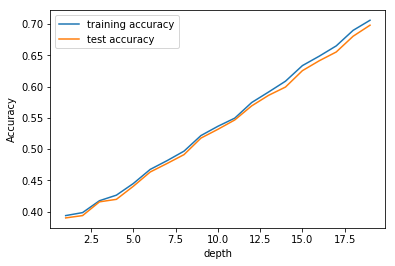

In [30]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
depth_settings= range(1, 20)
for max_depth in depth_settings:
    tree = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
plt.plot(depth_settings, training_accuracy, label="training accuracy")
plt.plot(depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()
plt.show()

In [34]:
from sklearn.tree import export_graphviz

In [35]:
export_graphviz(tree, out_file="tree.dot", class_names=["B_M", "B_F","O_M", "O_F"],
feature_names= ["lon", "lat", "start_time"], impurity=False, filled=True)

In [36]:
import graphviz

In [49]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

As shown above this algorithm on normalized data at maximum depth value of 2 performed better. Only CW and RW features are important in this model.

In [49]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.         0.6111817  0.         0.3888183  0.       ]


# # Random Forest

It is a collection of decision trees, where each tree is slightly different from the others. The idea behind this tree is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, is an advantage of this algorithm over decision tree.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=3)
#setting a maximum feature instead of all features to 3
rf.fit(X_train, y_train)
print("Accuracy on training set using normalized data with \
a default maximum depth = {:.2f}%".format(rf.score(X_train, y_train)*100))
print("Accuracy on test set using normalized data with \
a default maximum depth = {:.2f}%".format(rf.score(X_test, y_test)*100))

Accuracy on training set using normalized data with a default maximum depth = 99.85%
Accuracy on test set using normalized data with a default maximum depth = 98.42%


In [45]:
training_accuracy = []
test_accuracy = []
depth= range(1, 25)
for max_depth in depth:
    rf = RandomForestClassifier(n_estimators=100, max_features =3, max_depth=max_depth,random_state=0)
    rf.fit(X_train, y_train)
    training_accuracy.append(rf.score(X_train, y_train))
    test_accuracy.append(rf.score(X_test, y_test))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=3,max_depth=40)
#setting a maximum feature instead of all features to 3
rf.fit(X_train, y_train)
print("Accuracy on training set using normalized data with \
a default maximum depth of 25 = {:.2f}%".format(rf.score(X_train, y_train)*100))
print("Accuracy on test set using normalized data with \
a maximum depth of 25 = {:.2f}%".format(rf.score(X_test, y_test)*100))

Accuracy on training set using normalized data with a default maximum depth of 25 = 99.84%
Accuracy on test set using normalized data with a maximum depth of 25 = 98.46%


In [53]:
from sklearn.tree import export_graphviz
export_graphviz(rf.estimators_[99], out_file="RFtree.dot", class_names=["B_M", "B_F","O_M", "O_F"],
feature_names= ["FL","RW","CL","CW","BD"], impurity=False, filled=True)
#visualization only for the last tree 100th tree.

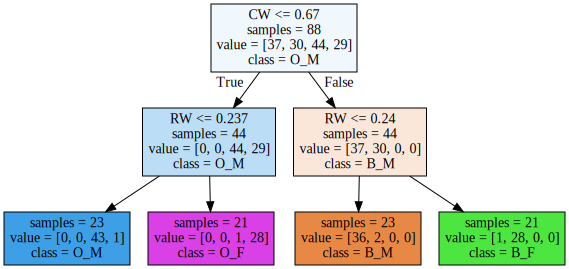

In [54]:
with open("RFtree.dot") as Rf:
    dot_graph = Rf.read()
graphviz.Source(dot_graph)

It performed the same like decision tree on test set but this algorithm improved overfitting.

## Deep learning Multi-Layer Perceptron (MLP)

Multilayer perceptrons for classification and regression problem can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLP) is a generalizations of linear models that perform multiple stages of processing to come to a decision.

In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0, max_iter=10000)
mlp.fit(X_train, y_train)
print("Accuracy on training set using original data = {:.2f}%".format
      (mlp.score(X_train, y_train)*100))
print("Accuracy on test set using original data = {:.2f}%".format(mlp.score(X_test, y_test)*100))

Accuracy on training set using original data = 25.68%
Accuracy on test set using original data = 25.69%


The worst performance so far on this data set with the default value. Performance was improved as shown below

In [56]:
mlpS = MLPClassifier(random_state=0,max_iter=1000)
mlpS.fit(X_train_scaled, y_train)
print("Accuracy on training set after standardized the data = {:.2f}%".format(
    mlpS.score(X_train_scaled, y_train)*100))
print("Accuracy on test set after standardized the data = {:.2f}%".format(
    mlpS.score(X_test_scaled, y_test)*100))

Accuracy on training set after standardized the data = 97.86%
Accuracy on test set after standardized the data = 98.33%


Finally this algorithm performed best in this data set followed by SVC using polynomial kernel. The performance of other supervised algorithms like Gaussian naive bayes, LDA and multinomial naive bayes were compared. But their performances were less than the one found using MLP.